In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt


## Successfully!


In [2]:
data = pd.read_csv('subset-covid-data.csv',header=0,encoding=('utf-8'))

In [3]:
data

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


In [5]:
#checkout the review date
data.date.value_counts()

2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: date, dtype: int64

In [6]:
cleaned_data = data[data.date == '2020-04-12']
cleaned_data

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0


avg new case: 376.8186274509804
median of new case: 11.5


Text(0, 0.5, 'total country')

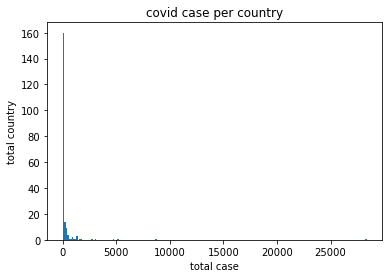

In [7]:
#draw chart about the new covid case per each country
print ("avg new case: " + str(cleaned_data.cases.mean()))
print ("median of new case: "+ str(cleaned_data.cases.median()))
plt.hist(cleaned_data.cases, bins = 200)
plt.title("covid case per country")
plt.xlabel("total case")
plt.ylabel("total country")

## có 50% quốc gia có số ca mắc mới <=11 ca, và có 50% quốc gia có số ca mắc mới >12 ca, nhưng giá trị trung bình = 376 lớn hơn rất nhiều so với 11.5 nên có một vài quốc gia có số ca mắc mới vô lớn, khác biệt hoàn toàn với các quốc gia còn lại
## Nhìn vào biểu đồ phân bố: Hầu như tất cả các quốc gia (khoảng 160/206) có số lượng ca mắc mới rất nhỏ, còn lại một số quốc gia có số ca mắc mới lớn hơn hẳn, đặc biệt có quốc gia có số ca mắc mới > 25000

In [8]:
print("all the new cases and death in all region")
cleaned_data.groupby('continent')['cases','deaths'].sum()

all the new cases and death in all region


C:\Users\Admin\AppData\Local\Temp/ipykernel_10032/4243504873.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cleaned_data.groupby('continent')['cases','deaths'].sum()


,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,29591,2966
Oceania,68,4


In [9]:
print ("5 countries to have highest number of new cases")
data = cleaned_data.sort_values('cases',ascending = False)
data.head(5)

5 countries to have highest number of new cases


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
190,Turkey,Asia,2020-04-12,12,4,2020,5138,95,TUR,82319724.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0


In [10]:
print ("also top 5 but in the death")
data = data.sort_values('deaths',ascending = False)
data.head(5)

also top 5 but in the death


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
18,Belgium,Europe,2020-04-12,12,4,2020,1351,327,BEL,11422068.0
